In [1]:
# BƯỚC 1: Import thư viện và gắn Google Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def clean_df(df):
    """
    Làm sạch và chuẩn hóa dữ liệu tiền ảo:
    - Chuyển đổi định dạng ngày
    - Làm sạch các cột số (giá, khối lượng, phần trăm thay đổi)
    - Hỗ trợ xử lý đơn vị khối lượng (K, M, B)
    """
    df = df.copy()

    # Xử lý khối lượng (Vol.)
    def convert_volume(val):
        if isinstance(val, str):
            val = val.replace(',', '')
            if val.endswith('K'):
                return float(val[:-1]) * 1_000
            elif val.endswith('M'):
                return float(val[:-1]) * 1_000_000
            elif val.endswith('B'):
                return float(val[:-1]) * 1_000_000_000
            return float(val)
        return val

    # Chuyển định dạng ngày
    df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

    # Làm sạch các cột số
    for col in ['Price', 'Open', 'High', 'Low']:
        df[col] = df[col].astype(str).str.replace(',', '').astype(float)

    df['Vol.'] = df['Vol.'].apply(convert_volume)
    df['Change %'] = df['Change %'].astype(str).str.replace('%', '').astype(float)

    return df.sort_values('Date')

In [3]:
# Đọc file
btc_raw = pd.read_csv('/content/drive/MyDrive/24-25 Sem2/PTDLKD/Dataset/Bitcoin Historical Data.csv')
eth_raw = pd.read_csv('/content/drive/MyDrive/24-25 Sem2/PTDLKD/Dataset/Ethereum Historical Data.csv')
bnb_raw = pd.read_csv('/content/drive/MyDrive/24-25 Sem2/PTDLKD/Dataset/BNB Historical Data.csv')

# Tiền xử lý
btc = clean_df(btc_raw)
eth = clean_df(eth_raw)
bnb = clean_df(bnb_raw)

# Kiểm tra dữ liệu thiếu (NaN) trước khi trực quan hóa
print("Số lượng giá trị thiếu trong từng bộ dữ liệu:")
print("Bitcoin:\n", btc.isnull().sum())
print("Ethereum:\n", eth.isnull().sum())
print("BNB:\n", bnb.isnull().sum())

Số lượng giá trị thiếu trong từng bộ dữ liệu:
Bitcoin:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Ethereum:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
BNB:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [4]:
display(btc)
display(eth)
display(bnb)

,Date,Price,Open,High,Low,Vol.,Change %
1903,2020-01-01,7199.8,7196.4,7259.4,7180.0,420280.0,0.05
1902,2020-01-02,6967.0,7199.7,7209.6,6901.4,632780.0,-3.23
1901,2020-01-03,7343.1,6967.1,7402.9,6884.1,936290.0,5.40
1900,2020-01-04,7376.8,7345.1,7433.1,7291.4,523910.0,0.46
1899,2020-01-05,7372.5,7376.8,7501.0,7345.6,628140.0,-0.06
...,...,...,...,...,...,...,...
4,2025-03-15,84341.3,83978.7,84679.5,83636.4,38400.0,0.43
3,2025-03-16,82578.4,84341.3,84942.5,82014.2,50040.0,-2.09
2,2025-03-17,84019.1,82580.3,84729.2,82525.0,58040.0,1.74
1,2025-03-18,82719.1,84019.1,84019.1,81171.3,58170.0,-1.55


,Date,Price,Open,High,Low,Vol.,Change %
1904,2020-01-01,130.75,129.21,132.97,128.81,10350000.0,1.19
1903,2020-01-02,127.19,130.75,130.77,126.74,11450000.0,-2.72
1902,2020-01-03,134.27,127.19,134.86,126.05,15670000.0,5.56
1901,2020-01-04,134.33,134.30,135.57,132.76,11160000.0,0.04
1900,2020-01-05,135.59,134.32,138.33,134.32,12190000.0,0.94
...,...,...,...,...,...,...,...
4,2025-03-15,1937.17,1910.71,1954.50,1904.30,225980.0,1.34
3,2025-03-16,1887.65,1936.53,1940.61,1863.28,353240.0,-2.56
2,2025-03-17,1926.35,1886.66,1951.93,1880.49,362870.0,2.05
1,2025-03-18,1932.61,1926.94,1934.56,1873.19,353900.0,0.32


,Date,Price,Open,High,Low,Vol.,Change %
1904,2020-01-01,13.70,13.73,13.88,13.65,4610000.0,-0.25
1903,2020-01-02,13.03,13.70,13.73,12.99,4490000.0,-4.85
1902,2020-01-03,13.65,13.02,13.98,13.01,4840000.0,4.72
1901,2020-01-04,13.85,13.65,13.89,13.53,4880000.0,1.49
1900,2020-01-05,14.07,13.85,14.37,13.83,5180000.0,1.58
...,...,...,...,...,...,...,...
4,2025-03-15,619.80,588.10,619.90,588.00,10970000.0,5.55
3,2025-03-16,602.30,619.50,622.70,593.20,11650000.0,-2.82
2,2025-03-17,631.60,602.40,643.10,602.40,22360000.0,4.87
1,2025-03-18,628.00,631.30,643.09,621.60,26670000.0,-0.57


In [5]:
from IPython.display import display, Markdown

# Hàm thống kê mô tả dữ liệu (giữ nguyên tên gốc)
def descriptive_stats(df, name):
    display(Markdown(f"##Thống kê mô tả cho **{name}**"))

    # 1. Kiểu dữ liệu + non-null
    display(Markdown("### ➤ Thông tin tổng quát"))
    info_df = pd.DataFrame({
        "Kiểu dữ liệu": df.dtypes,
        "Non-Null": df.notnull().sum(),
        "Null": df.isnull().sum()
    })
    display(info_df)

    # 2. Thống kê số học
    display(Markdown("### ➤ Thống kê mô tả (mean, std, min, max, quartiles)"))
    display(df.describe().round(2))

    # 3. Giá trị thiếu
    display(Markdown("### ➤ Số lượng giá trị thiếu trên từng cột"))
    display(df.isnull().sum().to_frame("Missing Values"))

    # 4. Giá trị duy nhất
    display(Markdown("### ➤ Số lượng giá trị duy nhất trên từng cột"))
    display(df.nunique().to_frame("Unique Values"))

    # 5. Số dòng trùng lặp
    duplicate_count = df.duplicated().sum()
    display(Markdown(f"### ➤ Số dòng trùng lặp: `{duplicate_count}`"))

In [6]:
descriptive_stats(btc, "Bitcoin")
descriptive_stats(eth, "Ethereum")
descriptive_stats(bnb, "BNB")

##Thống kê mô tả cho **Bitcoin**

### ➤ Thông tin tổng quát

,Kiểu dữ liệu,Non-Null,Null
Date,datetime64[ns],1904,0
Price,float64,1904,0
Open,float64,1904,0
High,float64,1904,0
Low,float64,1904,0
Vol.,float64,1904,0
Change %,float64,1904,0


### ➤ Thống kê mô tả (mean, std, min, max, quartiles)

,Date,Price,Open,High,Low,Vol.,Change %
count,1904,1904.00,1904.00,1904.00,1904.00,1.904000e+03,1904.00
mean,2022-08-09 12:49:54.957982976,38667.63,38627.83,39491.01,37718.93,3.202845e+07,0.19
min,2020-01-01 00:00:00,4826.00,4815.20,5369.30,3869.50,2.600000e+02,-39.18
25%,2021-04-20 18:00:00,20122.95,20113.25,20436.55,19636.70,5.981500e+04,-1.30
50%,2022-08-09 12:00:00,34476.90,34434.90,35246.05,33370.65,1.005150e+05,0.05
75%,2023-11-28 06:00:00,55873.82,55852.62,57528.75,53878.15,2.609375e+05,1.65
max,2025-03-19 00:00:00,106157.20,106157.20,109228.60,105350.60,4.470000e+09,19.41
std,NaN,23711.69,23700.42,24191.06,23171.81,2.497650e+08,3.38


### ➤ Số lượng giá trị thiếu trên từng cột

,Missing Values
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0


### ➤ Số lượng giá trị duy nhất trên từng cột

,Unique Values
Date,1904
Price,1900
Open,1898
High,1898
Low,1903
Vol.,1830
Change %,916


### ➤ Số dòng trùng lặp: `0`

##Thống kê mô tả cho **Ethereum**

### ➤ Thông tin tổng quát

,Kiểu dữ liệu,Non-Null,Null
Date,datetime64[ns],1905,0
Price,float64,1905,0
Open,float64,1905,0
High,float64,1905,0
Low,float64,1905,0
Vol.,float64,1905,0
Change %,float64,1905,0


### ➤ Thống kê mô tả (mean, std, min, max, quartiles)

,Date,Price,Open,High,Low,Vol.,Change %
count,1905,1905.00,1905.00,1905.00,1905.00,1.905000e+03,1905.00
mean,2022-08-10 00:00:00,2014.58,2013.64,2069.00,1952.67,1.298406e+07,0.24
min,2020-01-01 00:00:00,107.90,107.87,117.91,88.50,2.703000e+04,-44.55
25%,2021-04-21 00:00:00,1279.74,1277.02,1306.27,1241.45,3.777900e+05,-1.77
50%,2022-08-10 00:00:00,1892.42,1891.98,1935.99,1858.12,6.776700e+05,0.16
75%,2023-11-29 00:00:00,2929.31,2929.29,2993.23,2837.68,1.950000e+06,2.24
max,2025-03-19 00:00:00,4808.38,4808.34,4864.06,4715.43,1.790000e+09,25.96
std,NaN,1139.99,1140.79,1171.02,1105.47,1.127516e+08,4.39


### ➤ Số lượng giá trị thiếu trên từng cột

,Missing Values
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0


### ➤ Số lượng giá trị duy nhất trên từng cột

,Unique Values
Date,1905
Price,1898
Open,1894
High,1896
Low,1901
Vol.,1667
Change %,1048


### ➤ Số dòng trùng lặp: `0`

##Thống kê mô tả cho **BNB**

### ➤ Thông tin tổng quát

,Kiểu dữ liệu,Non-Null,Null
Date,datetime64[ns],1905,0
Price,float64,1905,0
Open,float64,1905,0
High,float64,1905,0
Low,float64,1905,0
Vol.,float64,1905,0
Change %,float64,1905,0


### ➤ Thống kê mô tả (mean, std, min, max, quartiles)

,Date,Price,Open,High,Low,Vol.,Change %
count,1905,1905.00,1905.00,1905.00,1905.00,1.905000e+03,1905.00
mean,2022-08-10 00:00:00,320.62,320.29,328.81,311.21,3.917260e+06,0.31
min,2020-01-01 00:00:00,9.25,9.25,10.41,6.50,8.182000e+04,-44.08
25%,2021-04-21 00:00:00,216.70,216.70,219.70,213.40,3.851700e+05,-1.52
50%,2022-08-10 00:00:00,305.90,305.90,312.60,299.01,8.369900e+05,0.14
75%,2023-11-29 00:00:00,497.50,497.42,515.55,481.10,2.950000e+06,2.02
max,2025-03-19 00:00:00,749.46,749.46,793.20,729.86,3.995400e+08,69.99
std,NaN,203.88,203.88,208.92,198.35,2.150526e+07,4.72


### ➤ Số lượng giá trị thiếu trên từng cột

,Missing Values
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0


### ➤ Số lượng giá trị duy nhất trên từng cột

,Unique Values
Date,1905
Price,1749
Open,1769
High,1762
Low,1773
Vol.,1533
Change %,999


### ➤ Số dòng trùng lặp: `0`

In [7]:
from IPython.display import display, Markdown

def plot_graphs(df, name):
    display(Markdown(f"##Trực quan hóa dữ liệu giá cho **{name}**"))

    # Biểu đồ histogram + KDE
    plt.figure(figsize=(12, 4))
    sns.histplot(df['Price'], kde=True, color='indianred')
    plt.title(f'Phân phối giá (Histogram + KDE) – {name}', fontsize=13)
    plt.xlabel('Giá (USD)')
    plt.ylabel('Tần suất')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Biểu đồ boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df['Price'], color='indianred')
    plt.title(f'Biểu đồ Boxplot giá – {name}', fontsize=13)
    plt.ylabel('Giá (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Biểu đồ đường theo thời gian
    plt.figure(figsize=(12, 4))
    plt.plot(df['Date'], df['Price'], color='indianred')
    plt.title(f'Biến động giá theo thời gian – {name}', fontsize=13)
    plt.xlabel('Ngày')
    plt.ylabel('Giá (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##Trực quan hóa dữ liệu giá cho **Bitcoin**

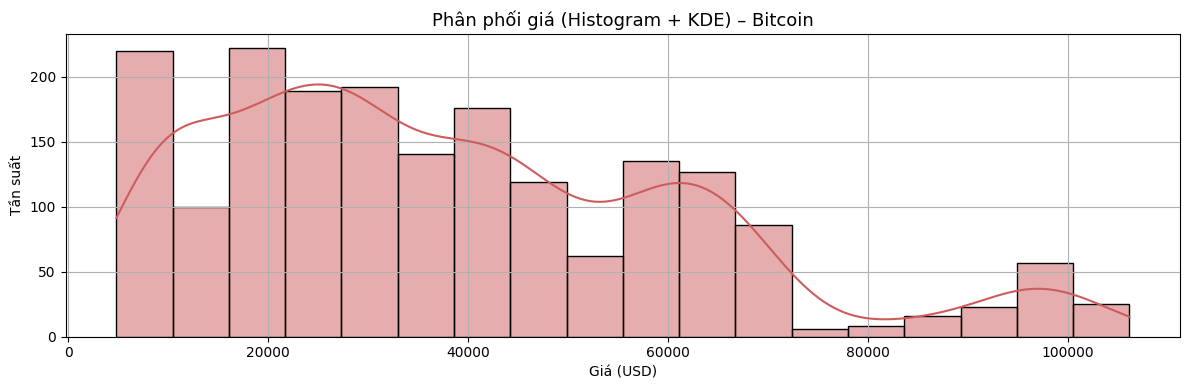

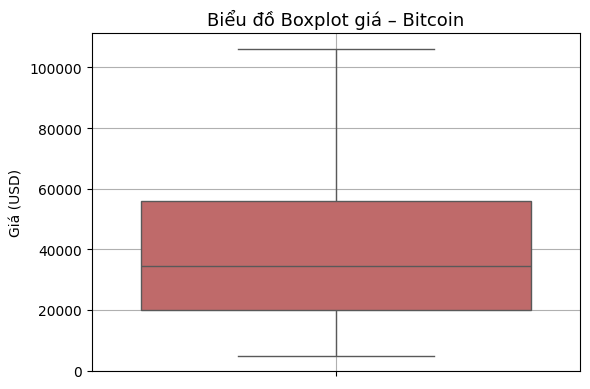

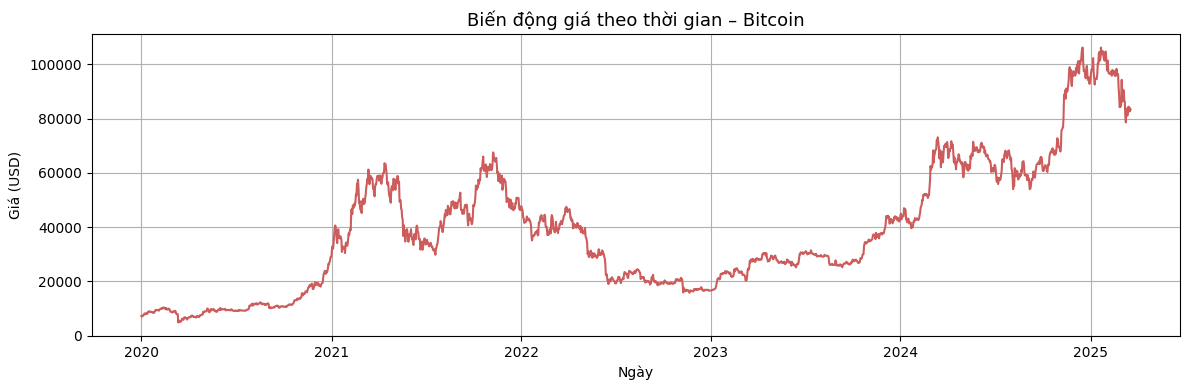

##Trực quan hóa dữ liệu giá cho **Ethereum**

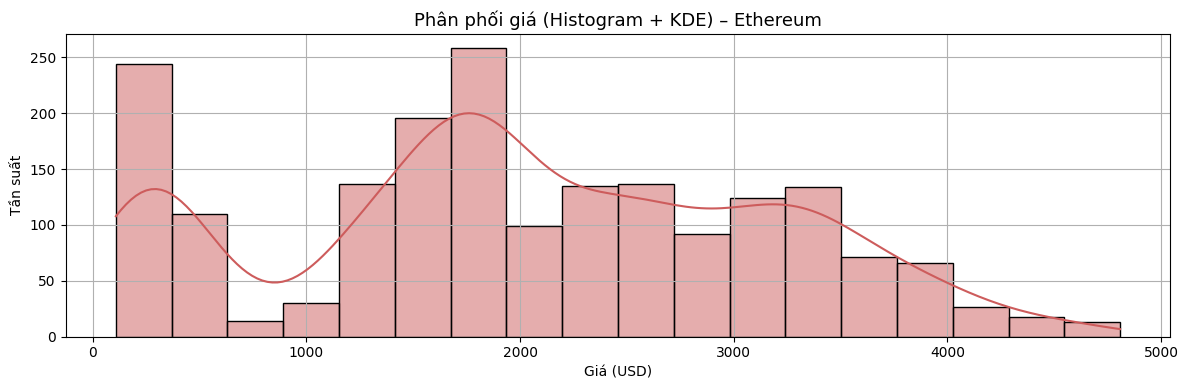

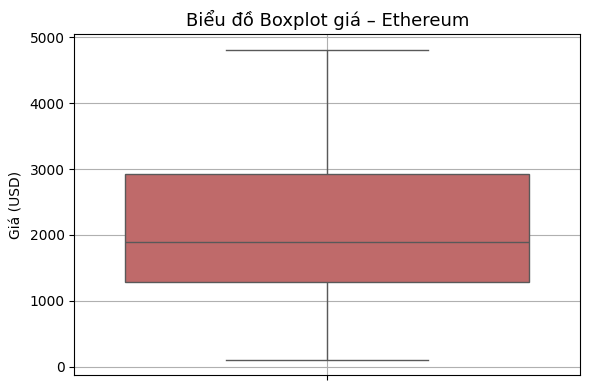

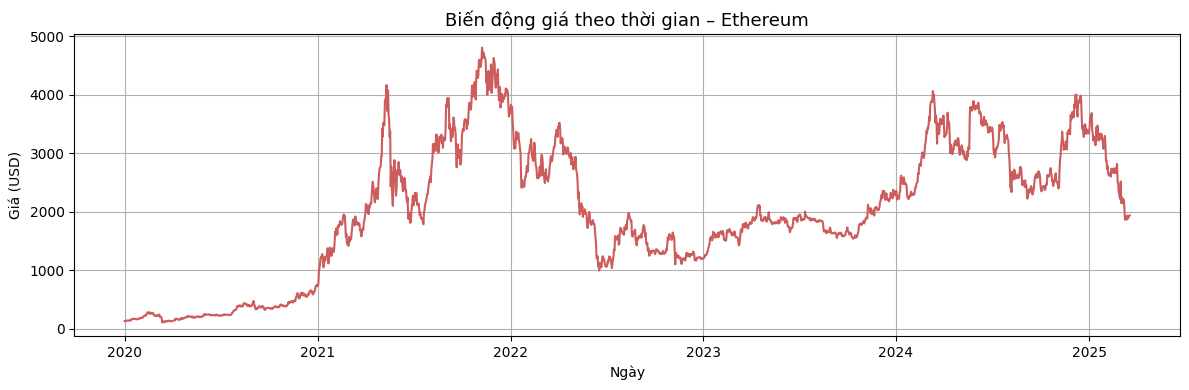

##Trực quan hóa dữ liệu giá cho **BNB**

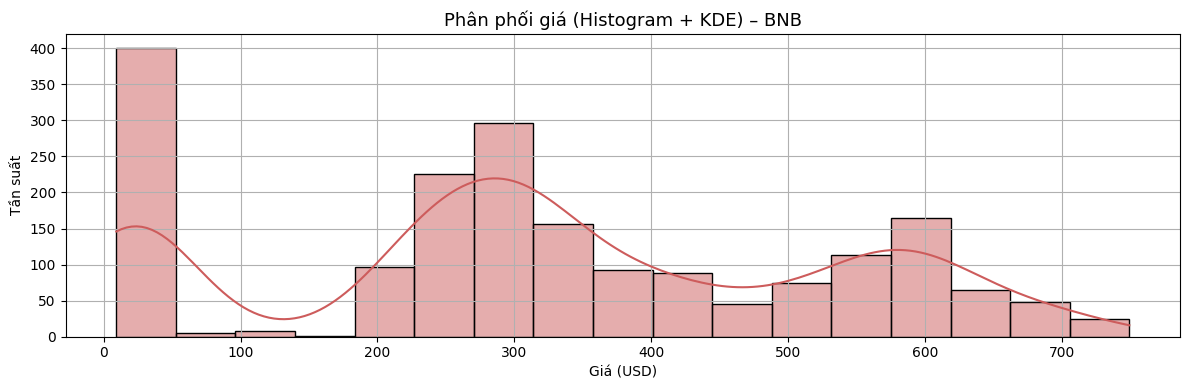

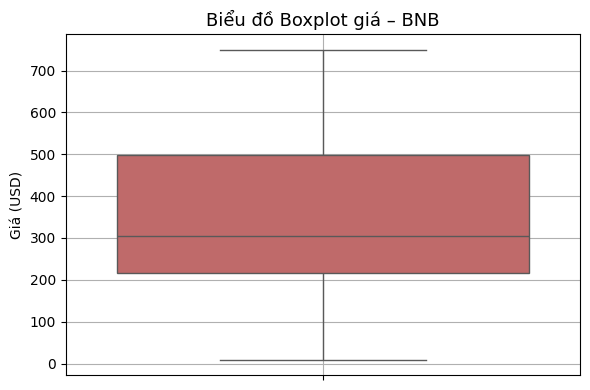

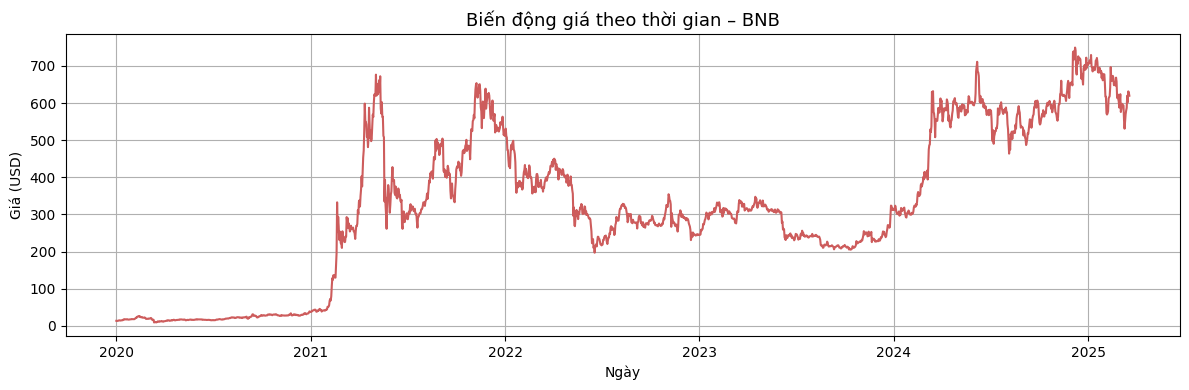

In [8]:
plot_graphs(btc, 'Bitcoin')
plot_graphs(eth, 'Ethereum')
plot_graphs(bnb, 'BNB')

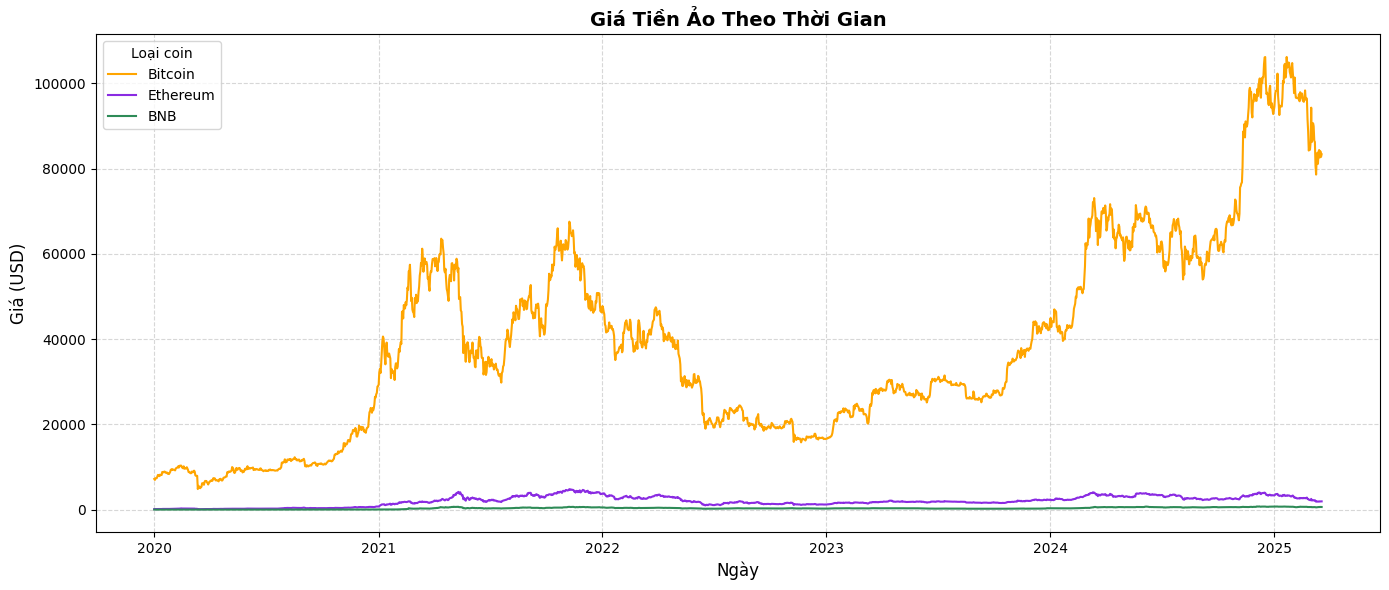

In [9]:
plt.figure(figsize=(14, 6))

# Vẽ từng dòng với màu cụ thể (nếu muốn đồng bộ hơn có thể gán màu rõ ràng)
plt.plot(btc['Date'], btc['Price'], label='Bitcoin', color='orange')
plt.plot(eth['Date'], eth['Price'], label='Ethereum', color='blueviolet')
plt.plot(bnb['Date'], bnb['Price'], label='BNB', color='seagreen')

# Tiêu đề và nhãn trục
plt.title('Giá Tiền Ảo Theo Thời Gian', fontsize=14, fontweight='bold')
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá (USD)', fontsize=12)

# Lưới, chú thích, căn chỉnh
plt.legend(title='Loại coin')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller
from IPython.display import display, Markdown

def run_adf_test(df, col='Price', seasonal_period=7):
    """
    Thực hiện ADF Test trên chuỗi thời gian để kiểm tra tính dừng
    Bao gồm: raw, diff, log+diff, seasonal diff
    """
    def print_result(test_name, series, explanation):
        result = adfuller(series.dropna())
        display(Markdown(f"### 📌 {test_name}"))
        print(f"ADF Statistic: {result[0]:.4f}")
        print(f"p-value: {result[1]:.4f}")
        if result[1] > 0.05:
            print(f"❗ Không dừng – {explanation}")
        else:
            print(f"✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA")

    display(Markdown(f"## 📈 ADF Test cho biến `{col}`"))

    # RAW
    print_result("1. Chuỗi gốc (RAW)", df[col], "cần differencing hoặc log transform")

    # 1st-order Differencing
    df_diff = df[col].diff()
    print_result("2. Sai phân bậc 1 (1st-order differencing)", df_diff, "có thể cần log transform hoặc seasonal differencing")

    # Log + Differencing
    df_log = np.log(df[col])
    df_log_diff = df_log.diff()
    print_result("3. Log + Sai phân (log-differencing)", df_log_diff, "có thể cần seasonal differencing")

    # Seasonal differencing
    df_seasonal = df[col].diff(periods=seasonal_period)
    print_result(f"4. Seasonal differencing (period={seasonal_period})", df_seasonal, "có thể cần xử lý bậc cao hơn hoặc STL decomposition")

In [11]:
run_adf_test(btc, 'Price')
run_adf_test(eth, 'Price')
run_adf_test(bnb, 'Price')

## 📈 ADF Test cho biến `Price`

### 📌 1. Chuỗi gốc (RAW)

ADF Statistic: -0.8453
p-value: 0.8054
❗ Không dừng – cần differencing hoặc log transform


### 📌 2. Sai phân bậc 1 (1st-order differencing)

ADF Statistic: -10.2763
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


### 📌 3. Log + Sai phân (log-differencing)

ADF Statistic: -14.3097
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


### 📌 4. Seasonal differencing (period=7)

ADF Statistic: -6.2466
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


## 📈 ADF Test cho biến `Price`

### 📌 1. Chuỗi gốc (RAW)

ADF Statistic: -2.1056
p-value: 0.2423
❗ Không dừng – cần differencing hoặc log transform


### 📌 2. Sai phân bậc 1 (1st-order differencing)

ADF Statistic: -10.8736
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


### 📌 3. Log + Sai phân (log-differencing)

ADF Statistic: -13.1177
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


### 📌 4. Seasonal differencing (period=7)

ADF Statistic: -6.4481
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


## 📈 ADF Test cho biến `Price`

### 📌 1. Chuỗi gốc (RAW)

ADF Statistic: -1.5916
p-value: 0.4878
❗ Không dừng – cần differencing hoặc log transform


### 📌 2. Sai phân bậc 1 (1st-order differencing)

ADF Statistic: -8.4684
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


### 📌 3. Log + Sai phân (log-differencing)

ADF Statistic: -11.9927
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


### 📌 4. Seasonal differencing (period=7)

ADF Statistic: -6.8184
p-value: 0.0000
✅ Chuỗi dừng – phù hợp cho mô hình ARIMA/SARIMA


In [12]:
def preprocess_coin_data(df, ratios):

    """
    Xử lý dữ liệu một đồng coin với tỷ lệ cho trước.
    - Không làm thay đổi dữ liệu gốc
    - Không chuẩn hóa
    - Không loại bỏ cột nào, chỉ bỏ NaN và dòng trùng lặp
    """

    df = df.copy().drop_duplicates()
    features = ['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
    df = df.dropna(subset=features)

    n = len(df)
    train_size = int(n * ratios[0])
    val_size = int(n * ratios[1])
    test_size = n - train_size - val_size

    train = df.iloc[:train_size].copy()
    val = df.iloc[train_size:train_size+val_size].copy()
    test = df.iloc[train_size+val_size:].copy()

    return train, val, test

In [13]:
splits = {
    '8_1_1': (0.8, 0.1, 0.1),
    '7_1.5_1.5': (0.7, 0.15, 0.15),
    '6_2_2': (0.6, 0.2, 0.2)
}

results = {}

for name, ratio in splits.items():
    results[name] = {
        'btc': preprocess_coin_data(btc, ratio),
        'eth': preprocess_coin_data(eth, ratio),
        'bnb': preprocess_coin_data(bnb, ratio),
    }

In [14]:
for name in results:
    print(f"\n📊 Tỷ lệ {name.replace('_', ':')}")
    for coin in ['btc', 'eth', 'bnb']:
        train, val, test = results[name][coin]
        print(f"\n{coin.upper()}:")
        print("Train:", len(train))
        print("Validation:", len(val))
        print("Test:", len(test))


📊 Tỷ lệ 8:1:1

BTC:
Train: 1523
Validation: 190
Test: 191

ETH:
Train: 1524
Validation: 190
Test: 191

BNB:
Train: 1524
Validation: 190
Test: 191

📊 Tỷ lệ 7:1.5:1.5

BTC:
Train: 1332
Validation: 285
Test: 287

ETH:
Train: 1333
Validation: 285
Test: 287

BNB:
Train: 1333
Validation: 285
Test: 287

📊 Tỷ lệ 6:2:2

BTC:
Train: 1142
Validation: 380
Test: 382

ETH:
Train: 1143
Validation: 381
Test: 381

BNB:
Train: 1143
Validation: 381
Test: 381


In [15]:
for name in results:
    print(f"\n🔎 Kiểm tra NaN - {name.replace('_', ':')}")
    for coin in ['btc', 'eth', 'bnb']:
        train, val, test = results[name][coin]
        print(f"\n{coin.upper()}:")
        print("Train:\n", train.isnull().sum())
        print("Validation:\n", val.isnull().sum())
        print("Test:\n", test.isnull().sum())


🔎 Kiểm tra NaN - 8:1:1

BTC:
Train:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Validation:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Test:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

ETH:
Train:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Validation:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Test:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

BNB:
Train:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64
Validation:
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype:

In [16]:
output_base = '/content/drive/MyDrive/24-25 Sem2/PTDLKD/Dataset/Processed'

for name in results:
    folder = os.path.join(output_base, name)
    os.makedirs(folder, exist_ok=True)

    for coin in ['btc', 'eth', 'bnb']:
        train, val, test = results[name][coin]
        coin_name = coin.lower()
        train.to_csv(f"{folder}/{coin_name}_train.csv", index=False)
        val.to_csv(f"{folder}/{coin_name}_val.csv", index=False)
        test.to_csv(f"{folder}/{coin_name}_test.csv", index=False)

print("Đã lưu thành công 9 file cho mỗi tỷ lệ vào 3 thư mục con!")

✅ Đã lưu thành công 9 file cho mỗi tỷ lệ vào 3 thư mục con!
